In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
import cv2
import seaborn as sns


In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### Loading the original training dataset to see the color distributions

In [4]:
class CustomDataset(Dataset):
    def __init__(self, filenames, images_data, transform=None):
        self.filenames = filenames # image name
        self.images_data = images_data # image data
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        # Creating image from the dataset
        img_data = self.images_data[idx]
        img = np.array(img_data, dtype=np.uint8)

        R_channel = img[0:1024].reshape(32, 32, 1)
        G_channel = img[1024:2048].reshape(32, 32, 1)
        B_channel = img[2048:].reshape(32, 32, 1)

        image = np.concatenate([R_channel,G_channel,B_channel], axis = 2)
    
        if self.transform:
            image = self.transform(image)

        return image, self.filenames[idx]

# Normalization and transforming to a tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [5]:
train_set = unpickle('train')

images_data = train_set[b'data']

filenames = [f.decode('utf-8') for f in train_set[b'filenames']]

dataset = CustomDataset(filenames=filenames, images_data=images_data, transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle = False)

In [42]:
red = train_set[b'data'][:,0:1024]
green = train_set[b'data'][:,1024:2048]
blue = train_set[b'data'][:,2048:3072]

Text(0.5, 1.0, 'Histogram of B channel')

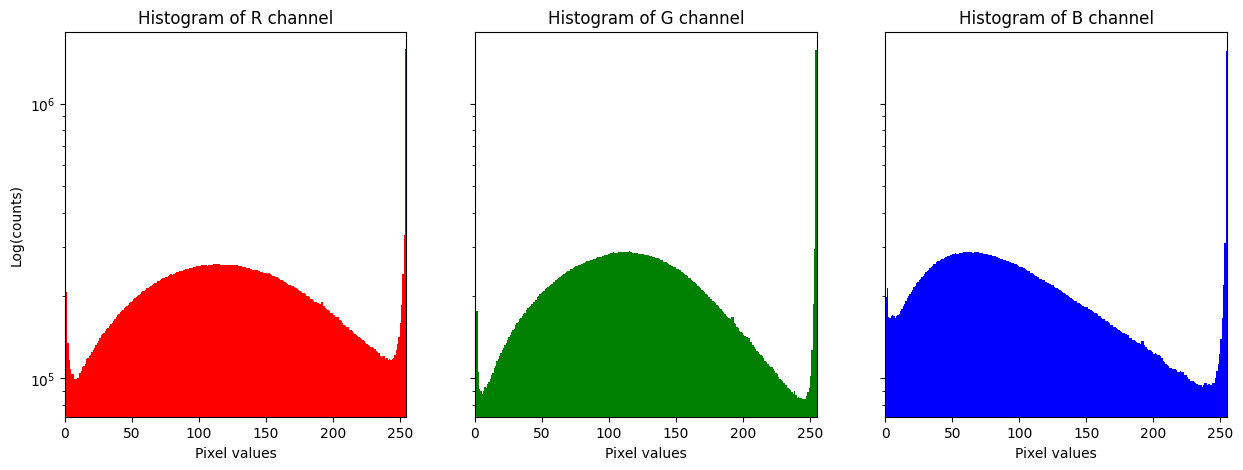

In [44]:
counts_red, bins_red = np.histogram(red.flatten(),255)
counts_green, bins_green = np.histogram(green.flatten(),255)
counts_blue, bins_blue = np.histogram(blue.flatten(),255)


fig, ax = plt.subplots(1,3,figsize=(15, 5),sharey=True)
ax[0].hist(bins_red[:-1], bins_red, weights=counts_red,color="red",edgecolor='none',log=True)
ax[0].set_xlim(0,255)
ax[0].set_xlabel("Pixel values")
ax[0].set_ylabel("Log(counts)")
ax[0].set_title("Histogram of R channel")


ax[1].hist(bins_green[:-1], bins_green, weights=counts_green, color="green",log=True)
ax[1].set_xlim(0,255)
ax[1].set_xlabel("Pixel values")
ax[1].set_title("Histogram of G channel")


ax[2].hist(bins_blue[:-1], bins_blue, weights=counts_blue, color="blue",log=True)
ax[2].set_xlim(0,255)
ax[2].set_xlabel("Pixel values")
ax[2].set_title("Histogram of B channel")



In [55]:
u_channel.flatten().astype(np.float32) -127

array([ 0.,  0.,  0., ..., 14., 13., 13.], dtype=float32)

/var/folders/3t/5nmppwwx2p7b5hfgq7bzhzc00000gn/T/ipykernel_14649/1134641852.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("seismic")


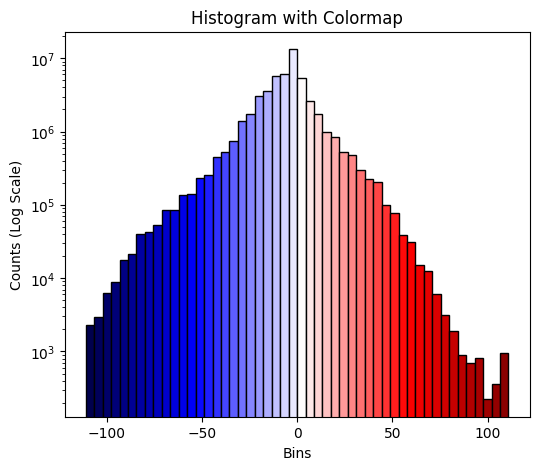

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

yuv_train_set = unpickle('yuv_train')

yuv_images_data = yuv_train_set[b'data']

y_channel = yuv_train_set[b'data'][:,0:1024].astype(np.float32)
u_channel = yuv_train_set[b'data'][:,1024:2048].astype(np.float32) -127
v_channel = yuv_train_set[b'data'][:,2048:3072].astype(np.float32) -127

counts_y, bins_y = np.histogram(y_channel.flatten(),50)
counts_u, bins_u = np.histogram(u_channel.flatten(),50)
counts_v, bins_v = np.histogram(v_channel.flatten(),50)

# Create figure
fig, ax = plt.subplots(1,3,figsize=(6, 5))

# Define a colormap (e.g., "seismic" for blue-yellow)
Y_cmap = cm.get_cmap("grayscale")
U_cmap = cm.get_cmap("seismic")
V_cmap = cm.get_cmap("PiYG")  

# Normalize the bin values to map colors correctly
Y_norm = mcolors.Normalize(vmin=min(bins_y), vmax=max(bins_y))
U_norm = mcolors.Normalize(vmin=min(bins_u), vmax=max(bins_u))
V_norm = mcolors.Normalize(vmin=min(bins_v), vmax=max(bins_v))

# Plot histogram bars with colors
for i in range(len(bins_y) - 1):  # Iterate over bins
    color = Y_cmap(Y_norm(bins_y[i]))  # Get color from cmap
    ax[0].bar(bins_y[i], counts_y[i], width=(bins_y[1] - bins_y[0]), 
           color=color, edgecolor="black", log=True, align='edge')
    
ax[0].set_title("Histogram with Colormap")
ax[0].set_xlabel("Bins")
ax[0].set_ylabel("Counts (Log Scale)")

# Plot histogram bars with colors
for i in range(len(bins_u) - 1):  # Iterate over bins
    color = U_cmap(U_norm(bins_u[i]))  # Get color from cmap
    ax[1].bar(bins_u[i], counts_u[i], width=(bins_u[1] - bins_u[0]), 
           color=color, edgecolor="black", log=True, align='edge')
    
ax[0].set_title("Histogram with Colormap")
ax[0].set_xlabel("Bins")
ax[0].set_ylabel("Counts (Log Scale)")
    
# Plot histogram bars with colors
for i in range(len(bins_v) - 1):  # Iterate over bins
    color = V_cmap(V_norm(bins_v[i]))  # Get color from cmap
    ax[2].bar(bins_v[i], counts_v[i], width=(bins_v[1] - bins_v[0]), 
           color=color, edgecolor="black", log=True, align='edge')
    
ax[0].set_title("Histogram with Colormap")
ax[0].set_xlabel("Bins")
ax[0].set_ylabel("Counts (Log Scale)")



plt.show()


ValueError: The 'color' keyword argument must have one color per dataset, but 1024 datasets and 1 colors were provided

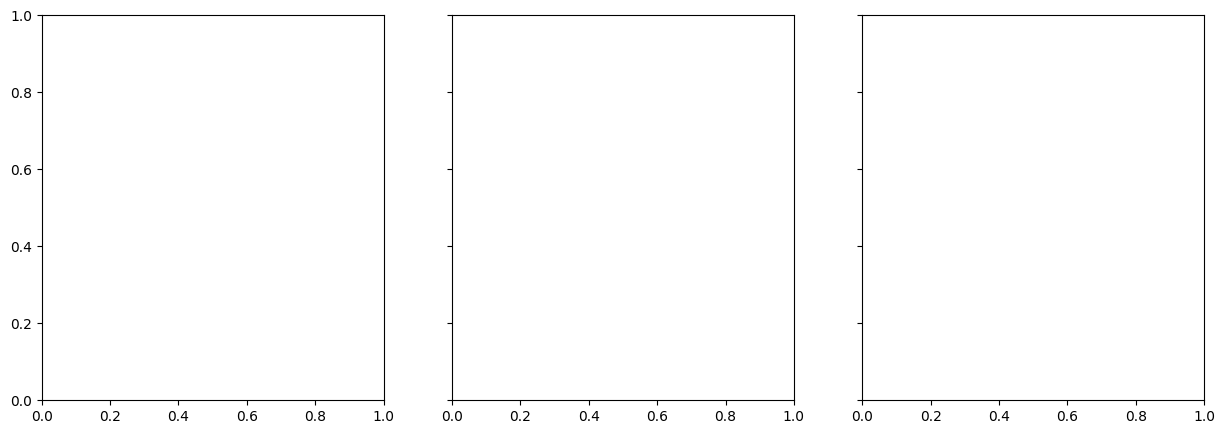

In [ ]:
import matplotlib.cm as cm

yuv_train_set = unpickle('yuv_train')

yuv_images_data = yuv_train_set[b'data']

y_channel = yuv_train_set[b'data'][:,0:1024].astype(np.float32)
u_channel = yuv_train_set[b'data'][:,1024:2048].astype(np.float32) -127
v_channel = yuv_train_set[b'data'][:,2048:3072].astype(np.float32) -127

counts_y, bins_y = np.histogram(y_channel.flatten(),255)
counts_u, bins_u = np.histogram(u_channel.flatten(),255)
counts_v, bins_v = np.histogram(v_channel.flatten(),255)

U_cmap = cm.get_cmap("seismic")  # Blue-Yellow colormap
V_cmap = cm.get_cmap("PiYG")  # Red-Green colormap


fig, ax = plt.subplots(1,3,figsize=(15, 5),sharey=True)
ax[0].hist(bins_y[:-1], bins_y, weights=counts_y,color="gray",log=True)
ax[0].set_xlim(0,255)
ax[0].set_xlabel("Pixel values")
ax[0].set_ylabel("Log(counts)")
ax[0].set_title("Histogram of Y channel")


ax[1].hist(bins_u[:-1], bins_u, weights=counts_u, color="green",log=True)
ax[1].set_xlim(-127,128)
ax[1].set_xlabel("Pixel values")
ax[1].set_title("Histogram of U channel")


ax[2].hist(bins_v[:-1], bins_v, weights=counts_v, color="blue",log=True)
ax[2].set_xlim(-127,128)
ax[2].set_xlabel("Pixel values")
ax[2].set_title("Histogram of V channel")


In [ ]:
class AnalysisDataset(Dataset):
    def __init__(self, filenames, images_data, bin_count=50):
        self.filenames = filenames # image name
        self.images_data = images_data # images data: data used to construct the images 
        self.bin_count = bin_count # number of bins used 
        self.bins = np.linspace(0, 1, bin_count)  # Bin edges
        # we are creating bins between 0 and 1 in order to have the values of u and v

    def __len__(self):
        return len(self.filenames)
    
    def bin_labels(self, values):
        return np.digitize(values, self.bins) -1 # Map values to bin indices
                                                   # This function takes values and assigns each value to a bin index
                                                   # based on self.bins. It returns the index starting from 0

    def __getitem__(self, idx):
        # Creating image from the dataset
        img_data = self.images_data[idx]
        img = np.array(img_data, dtype=np.uint32)

        Y_channel = (img[0:1024].reshape(32, 32, 1) / 255).astype(np.float32)
        U_channel = (img[1024:2048].reshape(32, 32, 1) / 255).astype(np.float32)
        V_channel = (img[2048:].reshape(32, 32, 1) / 255).astype(np.float32)
        #return y, u, v, self.filenames[idx]

    
        #return Y_channel, U_channel, V_channel, self.filenames[idx]

        # Binned shapes are (H,W)
        U_binned = self.bin_labels(U_channel)  # Discretize U 
        V_binned = self.bin_labels(V_channel)  # Discretize V

        paired_UV = np.stack((U_binned, V_binned), axis=2)

        return Y_channel, U_binned, V_binned,paired_UV, self.filenames[idx]

In [ ]:
yuv_train_set = unpickle('yuv_train')

yuv_images_data = yuv_train_set[b'data']

filenames = [f.decode('utf-8') for f in yuv_train_set[b'filenames']]

yuv_dataset = AnalysisDataset(filenames=filenames, images_data=yuv_images_data)
yuv_train_loader = DataLoader(yuv_dataset, batch_size=32, shuffle = False)

In [ ]:
# Input tensor(C,H,W) -> output tensor(H,W,C)
def rgb_yuv(array):
    new_array = array.permute(1,2, 0).numpy().copy()
    return torch.Tensor(cv2.cvtColor(new_array, cv2.COLOR_RGB2YUV))

# Input tensor(H,W,C) -> output tensor(C,H,W)
def yuv_rgb(array):
    new_array = array.numpy().copy()
    new_array = cv2.cvtColor(new_array, cv2.COLOR_YUV2RGB)
    return torch.tensor((new_array*255).astype(np.uint8)).permute(2, 0, 1)

In [ ]:
dataset = AnalysisDataset(filenames=filenames, images_data=yuv_images_data)
train_loader = DataLoader(dataset, batch_size=32, shuffle = False)

In [ ]:
all_U_binned = []
all_V_binned = []
all_UV_binned = []
for batch in train_loader:
    image_tensor, filename = batch  # Extract data from the batch
    for idx, image_rgb in enumerate(image_tensor):

Show the bins in the UV map

In [11]:
def plot_uv_histogram(all_U_binned, all_V_binned, bin_count=50):
    """
    Creates a histogram of binned U and V values.
    """
    U_flat = all_U_binned.flatten()  # Flatten tensor
    V_flat = all_V_binned.flatten()

    # Compute 2D histogram
    #hist, x_edges, y_edges = np.histogram2d(U_flat, V_flat, bins=bin_count, range=[[0, bin_count], [0, bin_count]])
    bins_u, counts_u = np.unique(U_flat,return_counts=True)[0],np.unique(U_flat,return_counts=True)[1]
    bins_v, counts_v = np.unique(V_flat,return_counts=True)[0],np.unique(V_flat,return_counts=True)[1]

    # Plot heatmap
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].bar(bins_u, counts_u, color='blue')
    ax[0].set_xlabel("U Bins")
    ax[0].set_ylabel("Counts")
    ax[0].set_title("Histogram of U values")

    ax[1].bar(bins_v, counts_v, color='red')
    ax[1].set_xlabel("V Bins")
    ax[1].set_ylabel("Counts")
    ax[1].set_title("Histogram of V values")

    plt.show()
    return bins_u,counts_u,bins_v,counts_v

def plot_uv_pairs_histogram(all_UV_binned, bin_count=50):
    """
    Creates a histogram of binned U,V paired values.
    """
    print("Shape of UV flat:", all_UV_binned.shape)
    UV_flat = all_UV_binned.flatten()  # Flatten tensor
    

    # Compute 2D histogram
    #hist, x_edges, y_edges = np.histogram2d(U_flat, V_flat, bins=bin_count, range=[[0, bin_count], [0, bin_count]])
    bins_uv, counts_uv = np.unique(UV_flat,return_counts=True)[0],np.unique(UV_flat,return_counts=True)[1]

    # Plot heatmap
    plt.bar(bins_uv, counts_uv, color='purple')
    plt.xlabel("UV Bins")
    plt.ylabel("Counts")
    plt.title("Histogram of U values")

    plt.show()
    
# Example usage
plot_uv_pairs_histogram(all_UV_binned,bin_count=50)



AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Example usage

bins_u,counts_u,bins_v,counts_v = plot_uv_histogram_pytorch(all_U_binned, all_V_binned, bin_count=50)
max_U = np.unique(bins_u[np.argmax(counts_u)])
max_V = np.unique(bins_v[np.argmax(counts_v)])

In [ ]:
# Define the number of bins
num_bins = 50
Y_fixed=128

# Create binned U and V values
U_bins = np.linspace(-128, 127, num_bins)
V_bins = np.linspace(-128, 127, num_bins)

# Create an image grid for binned U and V values
UV_binned_grid = np.zeros((num_bins, num_bins, 3), dtype=np.uint8)

# Iterate over the binned U, V values and convert to RGB
for i, U in enumerate(U_bins):
    for j, V in enumerate(V_bins):
        # Convert YUV to BGR
        YUV_color = np.array([Y_fixed, U + 128, V + 128], dtype=np.uint8)
        BGR_color = cv2.cvtColor(YUV_color.reshape(1, 1, 3), cv2.COLOR_YUV2BGR)
        UV_binned_grid[j, i] = BGR_color  # Assign to image (swapping j, i)

# Display the binned UV color map
plt.figure(figsize=(6, 6))
plt.scatter(max_U,max_V,s=50, facecolors='none', edgecolors='black',label="Most frequent bin")
plt.imshow(UV_binned_grid, extent=[0, num_bins - 1, 0, num_bins - 1])
plt.xlabel("U (Cb) Channel")
plt.ylabel("V (Cr) Channel")
plt.title(f"UV Color Map (Y = 128) with {num_bins} Bins")
plt.legend()
plt.grid(False)

plt.show()

Creating the probability distribution

In [ ]:
#
bins_u, counts_u = np.unique(all_U_binned.flatten(),return_counts=True)[0],np.unique(all_U_binned.flatten(),return_counts=True)[1]
bins_v, counts_v = np.unique(all_V_binned.flatten(),return_counts=True)[0],np.unique(all_V_binned.flatten(),return_counts=True)[1]

total_pixel = np.sum(counts_u)
full_bins = np.arange(0, num_bins)

# Create a dictionary mapping existing bins to their counts
bin_count_dict_u = dict(zip(bins_u, counts_u))
bin_count_dict_v = dict(zip(bins_v, counts_v))

# Ensure all bins have a count (default to 0 for missing bins)
full_counts_u = np.array([bin_count_dict_u.get(b, 0) for b in full_bins])
full_counts_v = np.array([bin_count_dict_v.get(b, 0) for b in full_bins])

probs_u = full_counts_u / np.sum(full_counts_u)
probs_v = full_counts_v / np.sum(full_counts_v)

'''
def u_distrib(bin_count=50):
    return np.random.choice(full_bins, bin_count,p=probs_u)

def v_distrib(bin_count=50):
    return np.random.choice(full_bins, bin_count,p=probs_v)
'''

In [ ]:
probs_u

### Compute weights for U and V binned separately

In [ ]:
def compute_weights(prob_dist, lambda_param=0.5):
    """
    Compute class rebalancing weights based on the pixel color distribution.
    """
    Q = len(prob_dist)  # Number of quantized bins
    uniform_dist = torch.ones(Q) / Q  # Uniform distribution

    # Compute the weighted probability
    smoothed_prob = (1 - lambda_param) * prob_dist + lambda_param * uniform_dist
    weights = 1.0 / smoothed_prob  # Inverse probability
    weights /= weights.sum()  # Normalize
    
    return weights

def soft_encode(y_true, bins, sigma=5):
    """
    Perform soft encoding by distributing weights across the nearest neighbors.
    - y_true: Ground truth colors (Nx1)
    - bins: Discrete ab bins (Qx1)
    - sigma: Gaussian kernel standard deviation
    """
    N = y_true.shape[0]
    print("Y_true shape: ",y_true.shape)
    Q = bins.shape[0]
    print("Q shape: ", bins.shape)
    
    # Compute Euclidean distance between each pixel and bin
    dist = torch.cdist(y_true, bins)  # Shape: (N, Q)
    
    # Find the 5 nearest neighbors
    knn_indices = torch.topk(-dist, k=5, dim=1).indices  # (N, 5)
    
    # Compute Gaussian weights
    knn_dist = torch.gather(dist, 1, knn_indices)  # Distances to 5 nearest neighbors
    weights = torch.exp(-knn_dist ** 2 / (2 * sigma ** 2))
    weights /= weights.sum(dim=1, keepdim=True)  # Normalize
    
    # Create soft-encoded one-hot vectors manually
    soft_labels = torch.zeros(N, Q, device=y_true.device)
    
    for i in range(N):
        soft_labels[i, knn_indices[i]] += weights[i]
    
    return soft_labels



lambda_param = 0.5
weights = compute_weights(torch.Tensor(probs_u), lambda_param)

'''
# Fake color data (ground truth and bins)
y_true = torch.randn(num_samples, 2)  # Ground truth colors
bins = torch.randn(num_bins, 2)  # Quantized ab bins

# Soft encoding
soft_labels = soft_encode(y_true, bins, sigma=5)
'''


In [ ]:

whole_labels = []
for img_data in images_data:
    img_rgb = np.array(img_data, dtype=np.uint8).reshape(3, 32, 32)
    img_rgb = np.transpose(img_rgb, (1, 2, 0))  # Convert to HxWxC format

    # Convert RGB to LUV (YUV-like)
    image_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Luv)
    
    # Normalize Y to [0,1]
    Y_channel = image_yuv[:, :, 0] / 255.0
    U_channel = torch.tensor(image_yuv[:, :, 1] / 255.0)
    V_channel = image_yuv[:, :, 2] / 255.0

    bins = torch.Tensor([np.linspace(0, 1, num_bins + 1),np.linspace(0, 1, num_bins + 1)]) 
    soft_labels = soft_encode(U_channel,bins, sigma=4)
    print("Shape soft labels: ",soft_labels.shape)
    #print("Max value: ",np.max(soft_labels))
    whole_labels.append(soft_labels)

### Compute weights for U and V binned together

In [ ]:
UV_binned_grid = np.zeros((num_bins, num_bins,2), dtype=np.uint8)

# Iterate over the binned U, V values and convert to RGB
for i, U in enumerate(U_bins):
    for j, V in enumerate(V_bins):
        UV_binned_grid[i, j] = np.array([U,V], dtype=np.uint8)

In [ ]:


def compute_weights(prob_dist, lambda_param=0.5):
    """
    Compute class rebalancing weights based on the pixel color distribution.
    """
    Q = len(prob_dist)**2  # Number of quantized bins
    uniform_dist = torch.ones(Q) / Q  # Uniform distribution

    # Compute the weighted probability
    smoothed_prob = (1 - lambda_param) * prob_dist + lambda_param * uniform_dist
    weights = 1.0 / smoothed_prob  # Inverse probability
    weights /= weights.sum()  # Normalize
    
    return weights

def soft_encode(y_true, bins, sigma=5):
    """
    Perform soft encoding by distributing weights across the nearest neighbors.
    - y_true: Ground truth colors (Nx2)
    - bins: Discrete ab bins (Qx2)
    - sigma: Gaussian kernel standard deviation
    """
    N = y_true.shape[0]
    print(N)
    Q = UV_binned_grid.shape[0]
    print(Q)
    
    # Compute Euclidean distance between each pixel and bin
    dist = torch.cdist(y_true, bins)  # Shape: (N, Q)
    
    # Find the 5 nearest neighbors
    knn_indices = torch.topk(-dist, k=5, dim=1).indices  # (N, 5)
    
    # Compute Gaussian weights
    knn_dist = torch.gather(dist, 1, knn_indices)  # Distances to 5 nearest neighbors
    weights = torch.exp(-knn_dist ** 2 / (2 * sigma ** 2))
    weights /= weights.sum(dim=1, keepdim=True)  # Normalize
    
    # Create soft-encoded one-hot vectors manually
    soft_labels = torch.zeros(N, Q, device=y_true.device)
    
    for i in range(N):
        soft_labels[i, knn_indices[i]] += weights[i]
    
    return soft_labels



lambda_param = 0.5
weights = compute_weights(torch.Tensor(probs_u), lambda_param)

'''
# Fake color data (ground truth and bins)
y_true = torch.randn(num_samples, 2)  # Ground truth colors
bins = torch.randn(num_bins, 2)  # Quantized ab bins

# Soft encoding
soft_labels = soft_encode(y_true, bins, sigma=5)
'''


In [ ]:

whole_labels = []
for img_data in images_data:
    img_rgb = np.array(img_data, dtype=np.uint8).reshape(3, 32, 32)
    img_rgb = np.transpose(img_rgb, (1, 2, 0))  # Convert to HxWxC format

    # Convert RGB to LUV (YUV-like)
    image_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Luv)
    
    # Normalize Y to [0,1]
    Y_channel = image_yuv[:, :, 0] / 255.0
    U_channel = image_yuv[:, :, 1] / 255.0
    V_channel = image_yuv[:, :, 2] / 255.0

    bins = torch.Tensor([np.linspace(0, 1, num_bins),np.linspace(0, 1, num_bins)]).T

    uv_channels = torch.Tensor([U_channel,V_channel]).T

    soft_labels = soft_encode(uv_channels, bins, sigma=4)
    print("Shape soft labels: ",soft_labels.shape)
    #print("Max value: ",np.max(soft_labels))
    whole_labels.append(soft_labels)